In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random, math

# (i)
def gen_graph():
    G = nx.Graph()
    N = 1000
    t = [0]
    T = N * (N - 1)
    p = 5/N

    for i in range(0,N):
        G.add_node(i)
        
    return [G,N,t,T,p]

gen_graph()

[<networkx.classes.graph.Graph at 0x7f3f35c1d278>, 1000, [0], 999000, 0.005]

In [6]:
def connect_graph():
    [G, N, t, T, p] = gen_graph()
    for time in range(0,T): # (ii), (iv)
        i = random.randint(0, N - 1) #1 vertice
        j = random.randint(0, N - 1) #2 vertice
        t.append(time)

        prob = random.uniform(0.0,1.0) #connect with probability p
        if prob < p: # (iii)
            G.add_edge(i, j)
    return [G, N, t, T, p]

[G,N,t,T,p] = connect_graph()

/home/falmeida/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


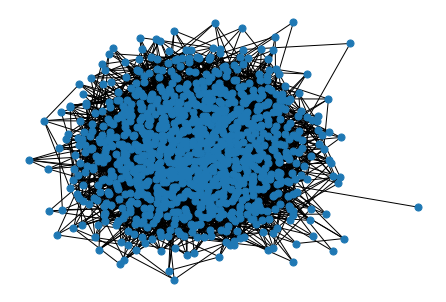

In [7]:
# draw network graph
import matplotlib.pyplot as plt
nx.draw(G, node_size = 50) # , with_labels=True,font_size=8

In [8]:
def poisson_func(k): # poisson function
    u = p * (N - 1) * 2
    K = []

    for i in range(0,len(k)):
        K.append(((math.exp(-u) * u ** k[i]) / (math.factorial(k[i])) ) * N)
    return (K)

In [9]:
# count degree distribution
degrees = [val for (node, val) in G.degree()]#

In [10]:
# repeat the procedure above R times
R = 10
for i in range(0, R): # number of trials executed
    [G, N, t, T, p] = connect() # repeat procedure
    dg = [val for (node, val) in G.degree()] # count degree distribution of trial
    for a in dg: # attach this trial to degree distribution
        degrees.append(a)

In [11]:
len(degrees)

11000

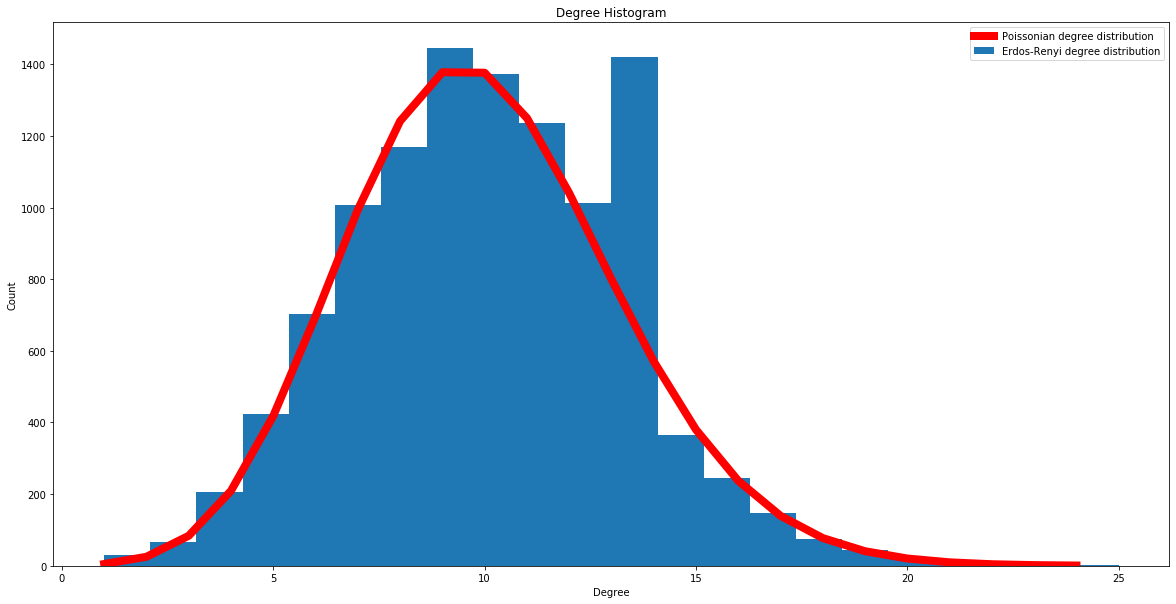

In [14]:
# plot degree histogram
bins = 22
plt.hist(degrees, bins = bins)
counts, bins = np.histogram(degrees, bins)

# histogram elements
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.plot()
plt.rcParams['figure.figsize'] = [20, 10]

# poissonian degree distribution
k = np.arange(min(bins), max(bins), 1)
kp = poisson_func(k)
kp = [x * (R + 1) for x in kp] #adjust for R trials (we are using absolute values)
plt.plot(k, kp, 'r', linewidth = 8)

# graph legend
plt.legend(['Poissonian degree distribution','Erdos-Renyi degree distribution'])
plt.show()